In [40]:
# 추출한 데이터 불러오기

import pandas as pd
import numpy as np

cats = {
    "반팔": "001001",
    "맨투맨": "001005",
    "후드집업": "002022",
    "숏패딩": "002012",
    "데님팬츠": "003002",
    "코튼팬츠": "003007",
}
selected_cat = "데님팬츠"

dir = "datasets/"
file_name = dir + selected_cat + "_data.csv"
data = pd.read_csv(file_name)
#data = data[["총장", "어깨너비", "가슴단면", "소매길이", "성별", "키", "몸무게", "후기"]].dropna(axis=0)
data = data[["총장", "허리단면", "엉덩이단면", "허벅지단면", "밑위", "밑단단면", "성별", "키", "몸무게", "후기"]].dropna(axis=0)
print(data)

          총장  허리단면  엉덩이단면  허벅지단면    밑위   밑단단면  성별    키  몸무게   후기
0       99.5  32.5   53.0  33.00  30.0  24.00   1  164   61  적당함
1       99.5  32.5   53.0  33.00  30.0  24.00   1  161   46  적당함
2       99.5  32.5   53.0  33.00  30.0  24.00   0  152   40  적당함
3       99.5  32.5   53.0  33.00  30.0  24.00   0  156   46  적당함
4       99.5  32.5   53.0  33.00  30.0  24.00   1  165   51  적당함
...      ...   ...    ...    ...   ...    ...  ..  ...  ...  ...
81601  100.0  43.0   52.5  33.50  22.5  18.00   1  173   78  적당함
81637  108.5  38.0   49.0  25.00  28.0  25.50   0  167   56  적당함
81643  106.0  40.0   54.0  32.75  31.0  24.75   0  173   67    큼
81644  106.0  40.0   54.0  32.75  31.0  24.75   1  180   68  적당함
81645  106.0  40.0   54.0  32.75  31.0  24.75   0  171   62  적당함

[34747 rows x 10 columns]


In [41]:
# 후기를 제외한 열은 입력 데이터로 사용
# 후기는 타깃 데이터
#총장,허리단면,엉덩이단면,허벅지단면,밑위,밑단단면,성별,키,몸무게,후기

#data_input = data[["총장", "어깨너비", "가슴단면", "소매길이", "성별", "키", "몸무게"]].to_numpy()
data_input = data[["총장", "허리단면", "엉덩이단면", "허벅지단면", "밑위", "밑단단면", "성별", "키", "몸무게"]].to_numpy()
data_target = data["후기"].to_numpy()

rv2num = {"큼": 2, "적당함": 1, "작음": 0}
for i in range(len(data_target)):
    data_target[i] = rv2num[data_target[i]]
data_target = data_target.astype(np.int64)

In [42]:
# 사이킷런의 train_test_split() 함수를 이용해 이 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=42
)

In [43]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [44]:
from sklearn.linear_model import SGDClassifier

In [48]:
sc = SGDClassifier(loss="log_loss", max_iter=10, random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [49]:
for _ in range(3, 300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

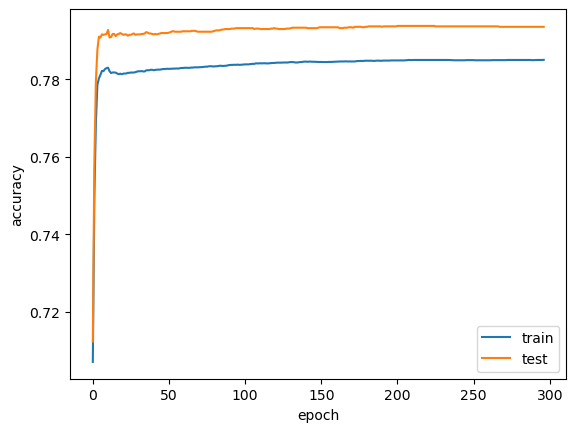

In [50]:
import matplotlib.pyplot as plt
plt.plot(train_score, label = 'train')
plt.plot(test_score, label = 'test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [51]:
sc = SGDClassifier(loss = 'log_loss', max_iter = 200, tol=None, random_state=0)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log_loss', max_iter=200, random_state=0, tol=None)

In [52]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7855333844973139
0.7939449752503741


In [53]:
# 총장, 어깨너비, 가슴단면, 소매길이, 성별, 키, 몸무게
input_data = np.array([[99.5, 32.5, 53.0, 33.00, 30.0, 24.00, 1, 164, 61]])
input_data_scaled = ss.transform(input_data)
proba = sc.predict_proba(input_data_scaled)
print(np.round(proba, decimals=3))

[[0.025 0.832 0.143]]
